In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\amrut\Downloads\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
69,2.0,0,0,1,12159,0,0,0,0,0,1,1930,4.189655,8.313343
7710,7.0,0,2,5,15732,1,1,1,1,1,0,1983,5.209705,8.600407
12491,5.0,0,2,3,15344,0,0,0,1,0,0,0,5.313206,7.443904


In [3]:
X = data.iloc[:, :-1]
y = data[['transform_price']]

In [4]:
XX = X.to_numpy()
yy = y.to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [6]:
tf.random.set_seed(20)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(60, return_sequences = True),
    tf.keras.layers.SimpleRNN(40, return_sequences = True),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics = ['mae'])

In [7]:
history=model.fit(X_train,y_train, epochs=50, callbacks = [lr_schedule])
predictions = model.predict(X_test)

Epoch 1/50
389/389 [==============================] - 3s 5ms/step - loss: 47.6381 - mae: 6.8294
Epoch 2/50
389/389 [==============================] - 2s 4ms/step - loss: 25.4612 - mae: 5.0215
Epoch 3/50
389/389 [==============================] - 2s 4ms/step - loss: 16.4030 - mae: 4.0216
Epoch 4/50
389/389 [==============================] - 2s 4ms/step - loss: 10.9113 - mae: 3.2745
Epoch 5/50
389/389 [==============================] - 2s 4ms/step - loss: 8.2133 - mae: 2.8367
Epoch 6/50
389/389 [==============================] - 2s 4ms/step - loss: 6.7299 - mae: 2.5625
Epoch 7/50
389/389 [==============================] - 2s 4ms/step - loss: 5.6164 - mae: 2.3351
Epoch 8/50
389/389 [==============================] - 2s 6ms/step - loss: 4.6626 - mae: 2.1206
Epoch 9/50
389/389 [==============================] - 2s 6ms/step - loss: 3.8071 - mae: 1.9079
Epoch 10/50
389/389 [==============================] - 2s 6ms/step - loss: 3.0361 - mae: 1.6935
Epoch 11/50
389/389 [========================

In [ ]:
#predictions[:5], y_test.to_numpy()[:5]

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.10616599059353468, 0.24181884130224301)

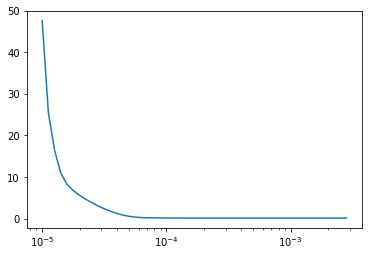

In [9]:
lrs = 1e-5 * (10 ** (np.arange(50) / 20))
plt.semilogx(lrs, history.history["loss"])


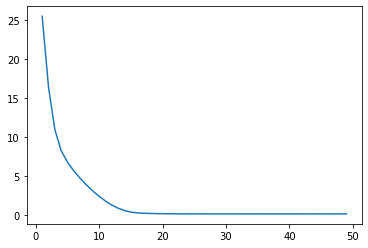

In [10]:
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

In [13]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 12489
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[582071.75]], dtype=float32)

In [12]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 10178
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[582071.75]], dtype=float32)

In [14]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(60, return_sequences = True),
    tf.keras.layers.SimpleRNN(40, return_sequences = True),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model1.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 7e-05), metrics = ['mae'])

In [15]:
history=model1.fit(X_train,y_train, epochs=100)


Epoch 1/100
389/389 [==============================] - 3s 4ms/step - loss: 15.8142 - mae: 3.7379
Epoch 2/100
389/389 [==============================] - 2s 4ms/step - loss: 4.9537 - mae: 2.1811
Epoch 3/100
389/389 [==============================] - 2s 4ms/step - loss: 2.8055 - mae: 1.6203
Epoch 4/100
389/389 [==============================] - 2s 4ms/step - loss: 1.5751 - mae: 1.1869
Epoch 5/100
389/389 [==============================] - 2s 4ms/step - loss: 0.8598 - mae: 0.8474
Epoch 6/100
389/389 [==============================] - 2s 4ms/step - loss: 0.4721 - mae: 0.6032
Epoch 7/100
389/389 [==============================] - 2s 4ms/step - loss: 0.2844 - mae: 0.4481
Epoch 8/100
389/389 [==============================] - 2s 5ms/step - loss: 0.2058 - mae: 0.3634
Epoch 9/100
389/389 [==============================] - 2s 6ms/step - loss: 0.1738 - mae: 0.3216
Epoch 10/100
389/389 [==============================] - 2s 6ms/step - loss: 0.1536 - mae: 0.2956
Epoch 11/100
389/389 [================

389/389 [==============================] - 2s 6ms/step - loss: 0.0951 - mae: 0.2247
Epoch 86/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0951 - mae: 0.2246
Epoch 87/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0957 - mae: 0.2253
Epoch 88/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0951 - mae: 0.2243
Epoch 89/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0952 - mae: 0.2242
Epoch 90/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0949 - mae: 0.2242
Epoch 91/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0948 - mae: 0.2238
Epoch 92/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0949 - mae: 0.2239
Epoch 93/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0951 - mae: 0.2249
Epoch 94/100
389/389 [==============================] - 2s 6ms/step - loss: 0.0951 - mae: 0.2242
Epoch 95/100
389/389 [=====================

In [16]:
predictions = model1.predict(X_test)

In [17]:
predictions[:5], y_test.to_numpy()[:5]

(array([[8.530895],
        [8.261555],
        [8.253733],
        [7.861148],
        [7.664925]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.08949790471104888, 0.22342847296430116)

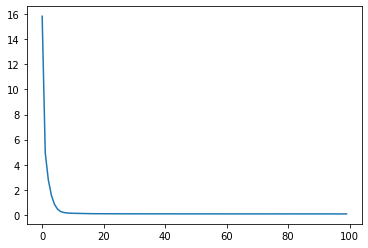

In [19]:
plt.plot(range(0, len(history.history["loss"])), history.history["loss"][0:])

In [21]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model1.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 12103
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[463784.53]], dtype=float32)

In [22]:
array = []
for i in data.columns[:-2]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
sq = float(input('living_area_m2'))
array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
to = pd.DataFrame(two_dim)
np.expm1(model1.predict(to)) * np.expm1(two_dim[-1][-1])

Enter the value of number_of_rooms : 1
Enter the value of floor_on : 1
Enter the value of total_floors : 1
Enter the value of bedroom : 1
Enter the value of pincode : 10178
Enter the value of balkon : 1
Enter the value of terrasse : 1
Enter the value of garten : 1
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 1
Enter the value of wohung : 1
Enter the value of construction_year : 1990
living_area_m2100


array([[463784.53]], dtype=float32)

In [23]:
model.save('hyper_rnn_1.hdf5')
model1.save('hyper_rnn_2.hdf5')

In [ ]:
model1.predict([1.0, 23.0, 4.0, 2.0, 32.0, 3.0, 32.0, 31.0, 1.0, 21.0, 32.0, 3.0, 21.0])

In [ ]:
sq_ftt = X_test.head(10)
sqr_ft = sq_ftt['living_area_m2']
p = predictions[:10]
p = p.tolist()
y_test = y_test[:10]

y_t = y_test.to_numpy().tolist()
y_t, p
for i, j, k in zip(y_t, sqr_ft, p):
    print('true_value: ',np.exp(i) * np.exp(j))
    print('predicted_value: ',np.exp(k) * np.exp(j))

In [ ]:
model1.predict([[2.4,3.4,43.9,35.75,54.3,345.4,52.4,123.5,13.6,13.7,45.8,24.9,2.0]])